In [2]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\napcc\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Preparando os DataFrames para as analises de quantos processos foram pedidos( evento 333)


In [55]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 333
eventos333_ativos = eventos333[eventos333['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 333
eventos333_ativos_ouro = eventos333_ativos[eventos333_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento333 em datetime
eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(eventos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = eventos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Temos agora o dataframe eventos333_ativos_ouro que contem informaçoes para os processos de ouro, com evento 333
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil

C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\3236622136.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\3236622136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\3236622136.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

## Fazendo Plots desses Dois dataframes (Evento 333)

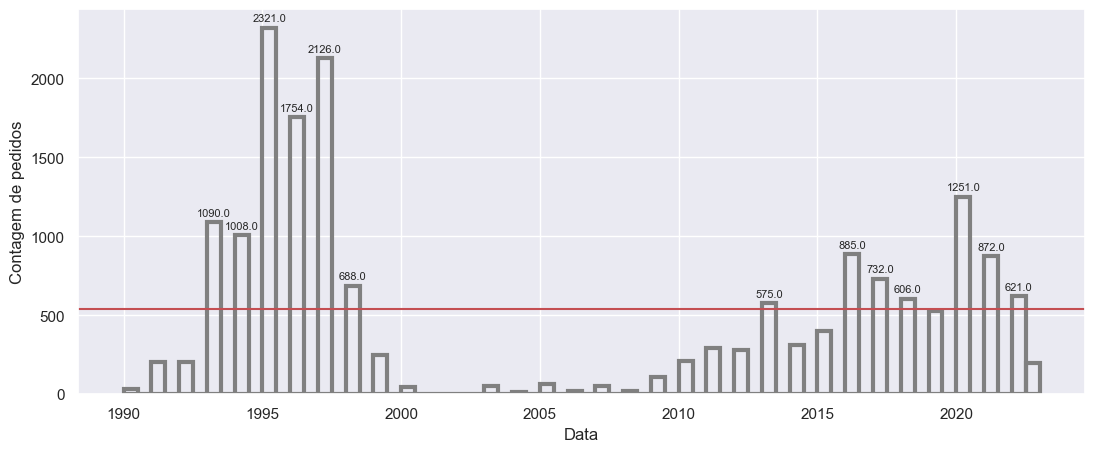

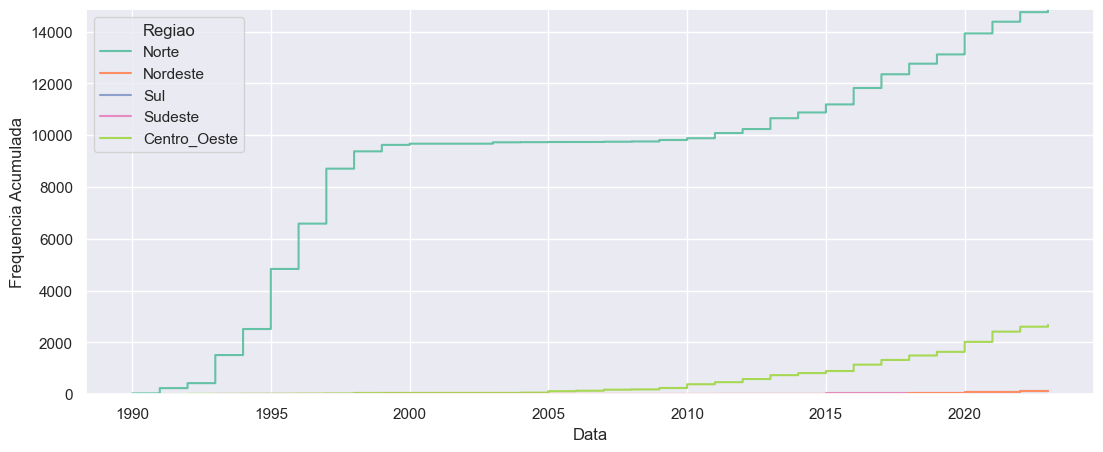

In [50]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(13, 5)})
y=sns.histplot(join_333_regiao['Data'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano

for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height()) > join_333_regiao['Data'].value_counts().mean() else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)





y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:
y.axhline(join_333_regiao['Data'].value_counts().mean(),color ='r')
plt.show()

#f = sns.ecdfplot(eventos333_ativos_ouro['Data'], stat='proportion')#Plotando um grafico de frequencia relativa acumulativa
#Com este plot, podemos perceber quantos pedidos para cada ano influenciam a frequencia acumulada
#f.set(xlabel='Data', ylabel='Frequencia Relativa Acumulada')
#plt.show()

#Plotando quebrando por regiao
#Assim conseguimos saber quais regiões do Brasil possuem os maiores pedidos
#w = sns.histplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count', alpha=.4, multiple='dodge',palette='Set2',
             #binwidth=1)
#w.set(xlabel='Data', ylabel='Contagem de pedidos')
#plt.show()


h = sns.ecdfplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count',palette='Set2')
h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()


## QUEBRANDO POR REGIAO Norte e Centro Oeste para o Evento 333

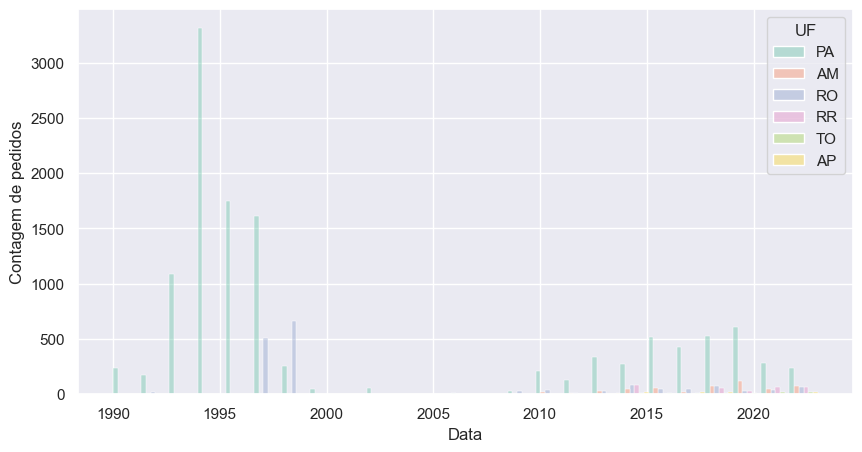

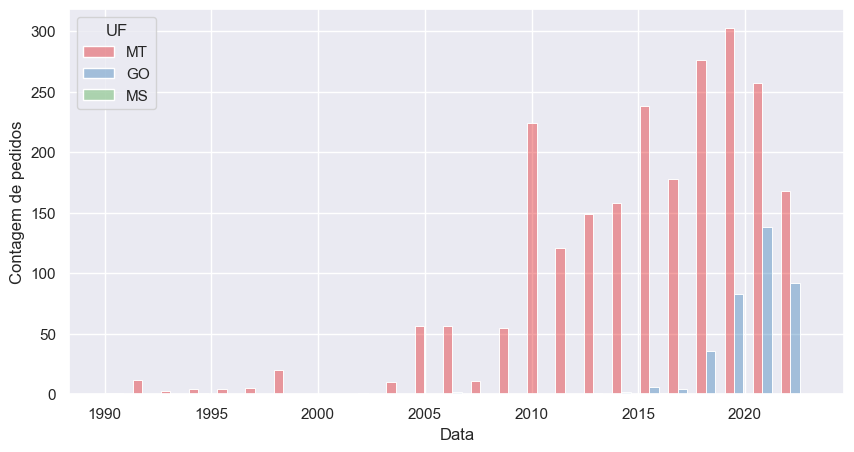

In [197]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(10, 5)})
#Fazendo um Histograma para Regiao Norte
y = sns.histplot(data=join_333_regiao.query('Regiao=="Norte"'), x="Data", hue="UF", stat='count', alpha=.4, multiple='dodge',bins=25,palette='Set2')

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=join_333_regiao.query('Regiao=="Centro_Oeste"'), x="Data", hue="UF", stat='count', alpha=.4, multiple='dodge',bins=25,palette='Set1')
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()



## Criando Análises para ver quantos processos foram pedidos para Evento 513

In [52]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 513
eventos513_ativos = eventos513[eventos513['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 513
eventos513_ativos_ouro = eventos513_ativos[eventos513_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento513 em datetime
eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(eventos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = eventos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Temos agora o dataframe eventos513_ativos_ouro que contem informaçoes para os processos de ouro, com evento 513
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil

C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\2836143302.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\2836143302.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\napcc\AppData\Local\Temp\ipykernel_2476\2836143302.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

## Fazendo Plot desses dois dataframes (evento 513)

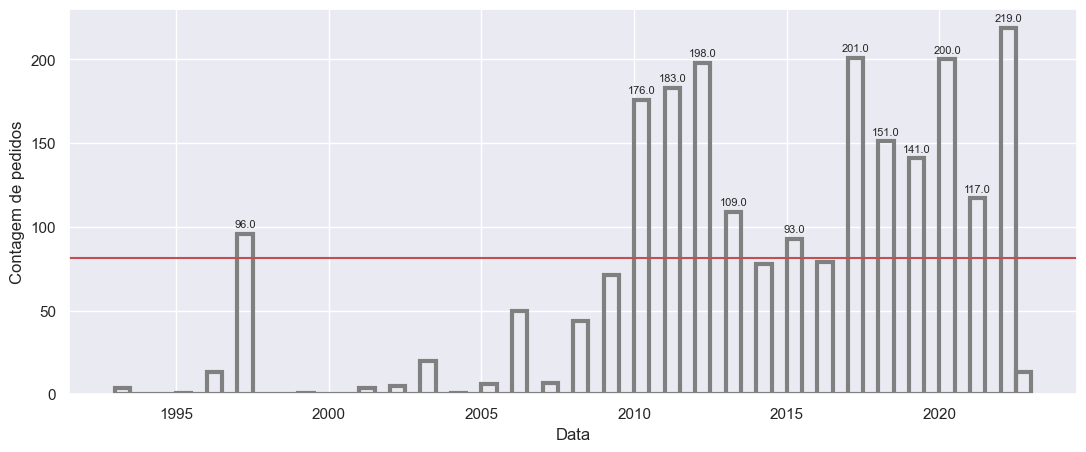

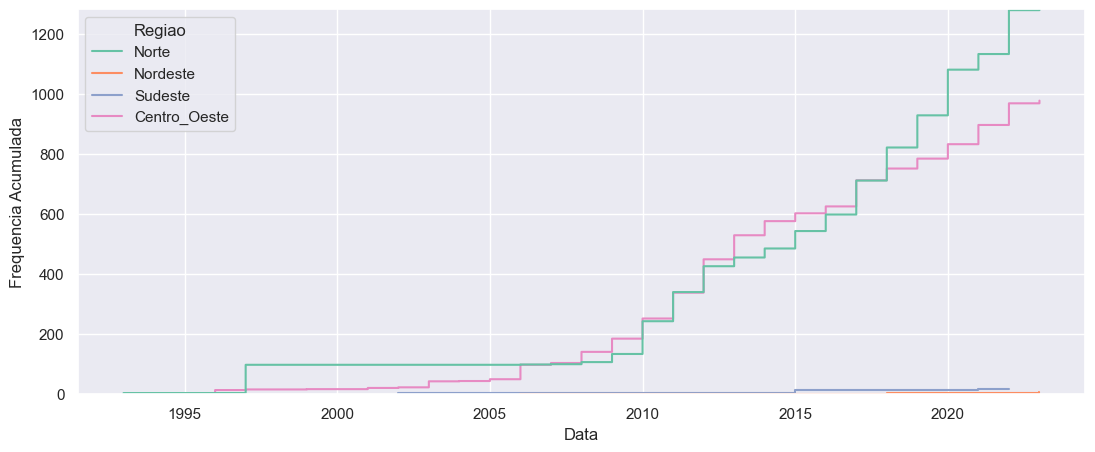

In [54]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(13, 5)})
y=sns.histplot(join_513_regiao['Data'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano
for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height()) > join_513_regiao['Data'].value_counts().mean() else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)
y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:
y.axhline(join_513_regiao['Data'].value_counts().mean(),color ='r')
plt.show()


h = sns.ecdfplot(data=join_513_regiao, x="Data", hue="Regiao", stat='count',palette='Set2')
h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()


## Quebrando Para Regiao Norte e Centro Oeste para evento 513

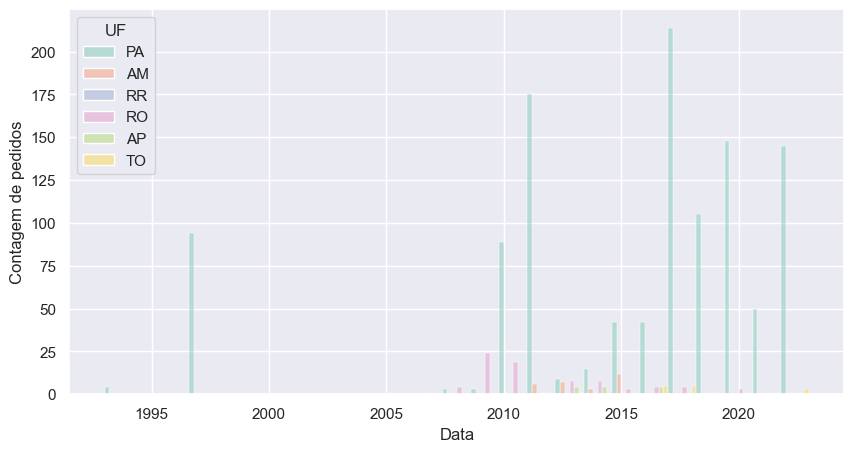

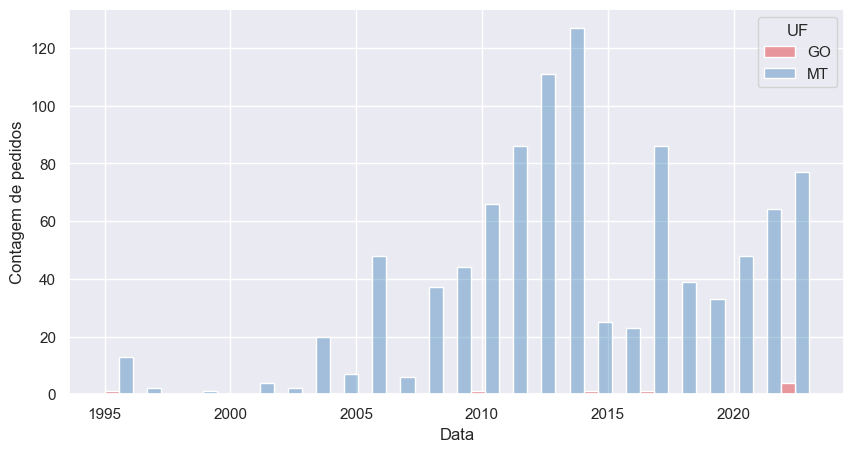

In [186]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(10, 5)})
#Fazendo um Histograma para Regiao Norte
y = sns.histplot(data=join_513_regiao.query('Regiao=="Norte"'), x="Data", hue="UF", stat='count', alpha=.4, multiple='dodge',bins=25,palette='Set2')

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=join_513_regiao.query('Regiao=="Centro_Oeste"'), x="Data", hue="UF", stat='count', alpha=.4, multiple='dodge',bins=25,palette='Set1')
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

